# MINI PROJECT 4
## MACHINE LEARNING FOR ANALYSIS AND PREDICTION OF ATTRITION

- Import all the needed dependecies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

- Load the dataset(csv) and show a sample of 6 rows

In [2]:
data = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv', delimiter=',')
data.sample(n=6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
517,25,No,Travel_Rarely,810,Sales,8,3,Life Sciences,1,707,...,3,80,1,4,4,3,3,2,1,2
1411,25,No,Travel_Rarely,309,Human Resources,2,3,Human Resources,1,1987,...,3,80,0,6,3,3,2,0,1,2
1080,46,No,Travel_Rarely,228,Sales,3,3,Life Sciences,1,1527,...,4,80,1,23,2,4,13,12,5,1
1184,54,No,Travel_Rarely,584,Research & Development,22,5,Medical,1,1665,...,3,80,1,36,6,3,10,8,4,7
1382,31,No,Non-Travel,976,Research & Development,3,2,Medical,1,1948,...,4,80,1,4,3,4,4,2,2,3
620,35,No,Travel_Rarely,1343,Research & Development,27,1,Medical,1,856,...,4,80,0,6,3,2,6,5,1,1


- Show how many values are null
- We have 0 null

In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- Display the number of col and rows

In [4]:
data.shape

(1470, 35)

- Lets print out some meaningfull statistical info about the data

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- We keep the Columns 'DistanceFromHome', 'HourlyRate' and 'Attrition' for further analysis towards attrition
- And check again(how ever it is not needed) for null values

In [6]:
import pandas as pd

# columns_to_keep is a list of column names we want to keep
columns_to_keep = ['DistanceFromHome', 'HourlyRate', 'Attrition']

columns_to_keep_all = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Using loc to select columns by label
df_new = data.loc[:, columns_to_keep]

df_new_all = data.loc[:, columns_to_keep_all]

# Using iloc to select columns by integer position
# You can use df.columns.get_loc() to get the integer position of column names
column_positions = [data.columns.get_loc(col) for col in columns_to_keep]
df_new = data.iloc[:, column_positions]
df_new.isnull().sum()

column_positions = [data.columns.get_loc(col) for col in columns_to_keep_all]
df_new_all = data.iloc[:, column_positions]
df_new_all.isnull().sum()

Age                         0
Attrition                   0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

- This is the new data set 5 first columns

In [7]:
df_new.head()

,DistanceFromHome,HourlyRate,Attrition
0,1,94,Yes
1,8,61,No
2,2,92,Yes
3,3,56,No
4,2,40,No


- We convert the 'Yes' or 'No' values to the numeric values 1 for 'Yes' and 0 for 'No'

In [8]:
# Handle non-numeric values in the 'Attrition' column
df_new['Attrition'] = df_new['Attrition'].map({'Yes': 1, 'No': 0})

# Check if conversion was successful
print(df_new.dtypes)

# Handle non-numeric values in the 'Attrition' column
df_new_all['Attrition'] = df_new_all['Attrition'].map({'Yes': 1, 'No': 0})

# Check if conversion was successful
print(df_new_all.dtypes)

DistanceFromHome    int64
HourlyRate          int64
Attrition           int64
dtype: object
Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object


C:\Users\Alexander Michelsen\AppData\Local\Temp\ipykernel_14904\3463787450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Attrition'] = df_new['Attrition'].map({'Yes': 1, 'No': 0})
C:\Users\Alexander Michelsen\AppData\Local\Temp\ipykernel_14904\3463787450.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_all['Attrition'] = df_new_all['Attrition'].map({'Yes': 1, 'No': 0})


In [9]:
df_new_all

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,80,0,17,3,2,9,6,0,8


# 2. Supervised machine learning: classification
## train, test, and validate two machine learning models for classification and prediction of attrition (e.g. Decision Tree and Naïve Bayes)

## apply appropriate methods and measures for assessing the validity of the models and recommend the
one with highest accuracy

- The result gives us Naïve Bayes selected as the best model.

In [10]:
# Prepare the data
X = df_new.drop(columns=['Attrition'])  # Features
y = df_new['Attrition']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train the Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Evaluate the Decision Tree model
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))

# Evaluate the Naïve Bayes model
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Classification Report for Naïve Bayes:")
print(classification_report(y_test, nb_predictions))

# Compare and select the best model based on accuracy or other evaluation metrics
if dt_accuracy > nb_accuracy:
    best_model = dt_classifier
    print("Decision Tree selected as the best model.")
else:
    best_model = nb_classifier
    print("Naïve Bayes selected as the best model.")

Decision Tree Accuracy: 0.7857142857142857
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       255
           1       0.21      0.23      0.22        39

    accuracy                           0.79       294
   macro avg       0.55      0.55      0.55       294
weighted avg       0.79      0.79      0.79       294

Naïve Bayes Accuracy: 0.8673469387755102
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Naïve Bayes selected as the best model.


C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- And for all numeric

In [11]:
# Prepare the data
X_all = df_new_all.drop(columns=['Attrition'])  # Features
y_all = df_new_all['Attrition']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train the Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Evaluate the Decision Tree model
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))

# Evaluate the Naïve Bayes model
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Classification Report for Naïve Bayes:")
print(classification_report(y_test, nb_predictions))

# Compare and select the best model based on accuracy or other evaluation metrics
if dt_accuracy > nb_accuracy:
    best_model = dt_classifier
    print("Decision Tree selected as the best model.")
else:
    best_model = nb_classifier
    print("Naïve Bayes selected as the best model.")

Decision Tree Accuracy: 0.7517006802721088
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       255
           1       0.20      0.28      0.23        39

    accuracy                           0.75       294
   macro avg       0.54      0.55      0.54       294
weighted avg       0.79      0.75      0.77       294

Naïve Bayes Accuracy: 0.8605442176870748
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       255
           1       0.47      0.41      0.44        39

    accuracy                           0.86       294
   macro avg       0.69      0.67      0.68       294
weighted avg       0.85      0.86      0.86       294

Naïve Bayes selected as the best model.


# Unsupervised machine learning: clustering
## apply at least one clustering algorithm (e.g. K-Means) for segmentation of the employees in groups of similarity

In [12]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10).fit(df_new)
    model.fit(df_new)
    distortions.append(sum(np.min(cdist(df_new, model.cluster_centers_, 'euclidean'), axis=1)) / df_new.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [11.86147658645864, 9.695454577717216, 8.70081801259602, 7.783904488879793, 6.776292937974676, 6.201753573966711, 5.723847113438012, 5.450488146569455]


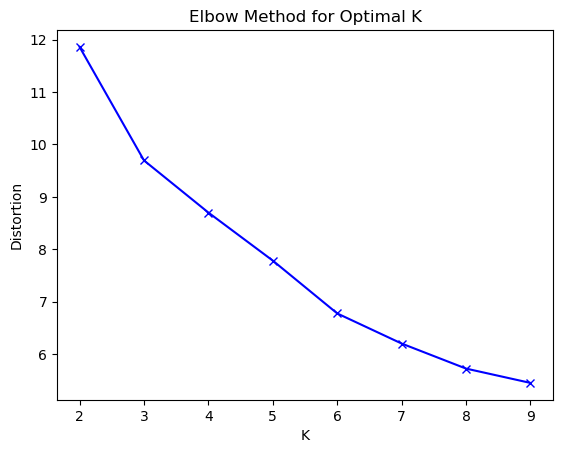

In [13]:
# Plot the distortion to discover the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [14]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions_all = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10).fit(df_new_all)
    model.fit(df_new_all)
    distortions_all.append(sum(np.min(cdist(df_new_all, model.cluster_centers_, 'euclidean'), axis=1)) / df_new_all.shape[0]) 
print("Distortion for all numeric: ", distortions_all)

Distortion for all numeric:  [468.4991847595323, 395.8134416165852, 331.55301831367944, 291.1709234609543, 261.0875669232269, 244.97747349841143, 231.17793889228776, 219.20957457542195]


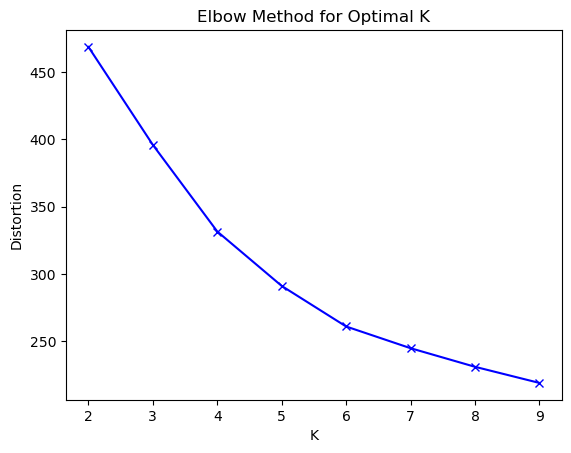

In [15]:
# Plot the distortion to discover the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions_all, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [16]:
# Optimal number of clusters K
num_clusters = 7

In [17]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [18]:
kmeans.fit(df_new)

KMeans(n_clusters=7, n_init=20)

- Here we can really se that the silhouette score computes to 2 clusters as the best. This is of cause because the attrition only have two options 'Yes' or 1 or 'No' or 0.

In [19]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.5318282802690022

Number of clusters = 3
Silhouette score = 0.42409000313798173

Number of clusters = 4
Silhouette score = 0.3617172566391185

Number of clusters = 5
Silhouette score = 0.4233456344270148

Number of clusters = 6
Silhouette score = 0.42185406329664105

Number of clusters = 7
Silhouette score = 0.4380084134281008

Number of clusters = 8
Silhouette score = 0.4092742976524751

Number of clusters = 9
Silhouette score = 0.41119248948317605


- Now for all

In [20]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X_all)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.0016337285767800975

Number of clusters = 3
Silhouette score = -0.021946102779674855

Number of clusters = 4
Silhouette score = -0.030642324744335172

Number of clusters = 5
Silhouette score = -0.03598855461639067

Number of clusters = 6
Silhouette score = -0.04927379140185723

Number of clusters = 7
Silhouette score = -0.06509762078860581

Number of clusters = 8
Silhouette score = -0.04903056656726807

Number of clusters = 9
Silhouette score = -0.07001486727270931


- Here we can really se that the silhouette score computes to 2 clusters as the best. This is of cause because the attrition only have two options 'Yes' or 1 or 'No' or 0.

C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

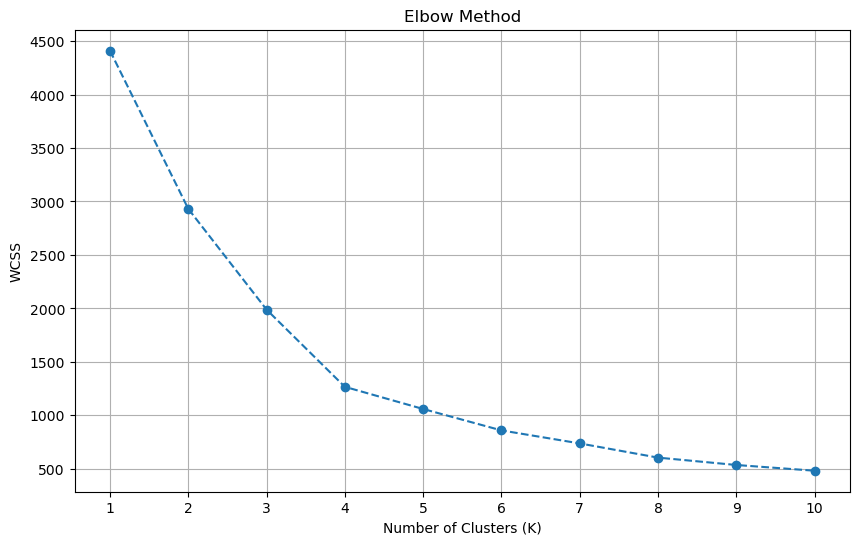

C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         DistanceFromHome  HourlyRate  Attrition
Cluster                                         
0                8.915653   65.952149        0.0
1               10.632911   65.573840        1.0


C:\Users\Alexander Michelsen\AppData\Local\Temp\ipykernel_14904\4083511021.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cluster'] = kmeans.labels_


In [21]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with relevant employee data

# Step 2: Feature Selection
columns_to_keep

# Step 3: Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new[columns_to_keep])

# Step 4: Choosing the Number of Clusters (K)
# Use the Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (K)

# Step 5: Model Training
k = 2  # Example: choose the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

# Step 6: Cluster Assignment
df_new['Cluster'] = kmeans.labels_

# Step 7: Cluster Analysis
cluster_summary = df_new.groupby('Cluster')[columns_to_keep].mean()
print(cluster_summary)

# Step 8: Interpretation
# Analyze the characteristics of each cluster to derive insights and recommendations

In [22]:
df_new

,DistanceFromHome,HourlyRate,Attrition,Cluster
0,1,94,1,1
1,8,61,0,0
2,2,92,1,1
3,3,56,0,0
4,2,40,0,0
...,...,...,...,...
1465,23,41,0,0
1466,6,42,0,0
1467,4,87,0,0
1468,2,63,0,0


## Here we try with all numeric columns non excepted

C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

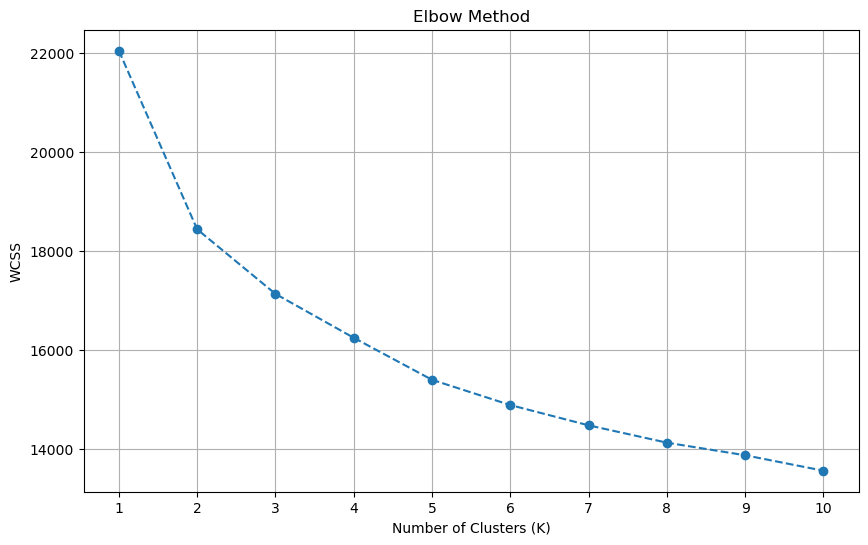

C:\Users\Alexander Michelsen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               Age  Attrition   DailyRate  DistanceFromHome  Education  \
Cluster                                                                  
0        40.974948   0.093946  797.563674          9.083507   3.056367   
1        34.965691   0.193744  804.864783          9.245207   2.843592   

         EmployeeCount  EmployeeNumber  RelationshipSatisfaction  \
Cluster                                                            
0                  1.0     1019.509395                  2.699374   
1                  1.0     1027.454087                  2.718466   

         StandardHours  StockOptionLevel  TotalWorkingYears  \
Cluster                                                       
0                 80.0          0.855950          17.300626   
1                 80.0          0.763875           8.369324   

         TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Cluster                                                           
0                     2.864301         2.80

C:\Users\Alexander Michelsen\AppData\Local\Temp\ipykernel_14904\4253795043.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_all['Cluster'] = kmeans.labels_


In [23]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with relevant employee data

# With all numeric columns

# Step 3: Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new_all[columns_to_keep_all])

# Step 4: Choosing the Number of Clusters (K)
# Use the Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (K)

# Step 5: Model Training
k = 2  # Example: choose the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

# Step 6: Cluster Assignment
df_new_all['Cluster'] = kmeans.labels_

# Step 7: Cluster Analysis
cluster_summary = df_new_all.groupby('Cluster')[columns_to_keep_all].mean()
print(cluster_summary)

# Step 8: Interpretation
# Analyze the characteristics of each cluster to derive insights and recommendations

In [24]:
df_new_all

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cluster
0,41,1,1102,1,2,1,1,1,80,0,8,0,1,6,4,0,5,1
1,49,0,279,8,1,1,2,4,80,1,10,3,3,10,7,1,7,0
2,37,1,1373,2,2,1,4,2,80,0,7,3,3,0,0,0,0,1
3,33,0,1392,3,4,1,5,3,80,0,8,3,3,8,7,3,0,1
4,27,0,591,2,1,1,7,4,80,1,6,3,3,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,80,1,17,3,3,5,2,0,3,1
1466,39,0,613,6,1,1,2062,1,80,1,9,5,3,7,7,1,7,1
1467,27,0,155,4,3,1,2064,2,80,1,6,0,3,6,2,0,3,1
1468,49,0,1023,2,3,1,2065,4,80,0,17,3,2,9,6,0,8,0
